## Classification-Guided Encoding CIFAR10

In [1]:
import torch
import argparse
import CIFAR10_122   
device = "cuda" if torch.cuda.is_available() else "cpu"
args = argparse.Namespace(
    data_path="../data",
    batch_size=128,
    latent_dim=128,
    device=device
)

# Architecture Reasoning 

## 1. Data Loading and Augmentation

### What We Do:
- Use CIFAR-10 dataset (10 classes, RGB images).
- Add **data augmentation** for better generalization:
  - Random horizontal flip
  - Small random rotation
- Normalize images to range `[-1, 1]`.

### Why It Helps:
- Prevents overfitting
- Makes the model more robust to real-world variation

---

## 2. Encoder Model 

### Layer Breakdown:
1. **Conv Layer 1 (3 → 64 channels)**
   - Stride 2, Kernel 4 → downscales to (16×16)
   - Adds BatchNorm + ReLU
   - Finds basic textures  

2. **Conv Layer 2 (64 → 128 channels)**
   - Downscales to (8×8)
   - Learns more detailed shapes

3. **Conv Layer 3 (128 → 128 latent dim)**
   - Outputs single 1×1 features (global info)
   - Final compressed representation

### Why It Works:
- Small but deep enough to learn meaningful encodings
- BatchNorm stabilizes training

---

## 3. Classifier 

### What It Looks Like:
- Fully connected layers:
  - `128 → 64 → 10`
- ReLU + Dropout (0.5) to reduce overfitting

### Why It Works:
- Lightweight
- Regularized with dropout
- Just enough to classify from compact latent vectors

---

## 4. Training Setup

| Component            | Value                    | Why                     |
|----------------------|--------------------------|--------------------------|
| Loss Function        | CrossEntropyLoss         | Standard for classification |
| Optimizer            | Adam + weight decay      | Fast and stable          |
| Batch Size           | 128                      | Adjustable for GPU       |
| Epochs               | 30                       | Enough to learn patterns |
| LR Scheduler         | StepLR every 10 epochs   | Helps fine-tune at end   |

---

## 5. Training Loop Logic

### Per Epoch:
- Train on all batches
- Track **loss and accuracy**
- Run **validation** after each epoch
- Adjust learning rate gradually

### Why It’s Good:
- Combines performance tracking with learning rate tuning
- Helps avoid overfitting while maintaining speed

In [2]:
train_loader, val_loader, test_loader = CIFAR10_122.load_data(args)
encoder_model = CIFAR10_122.Encoder(args.latent_dim).to(args.device)
classifier_model = CIFAR10_122.Classifier(args.latent_dim).to(args.device)

Files already downloaded and verified


Files already downloaded and verified


## Training Autoencoder Classifier

Epoch [1/2], Train Loss: 1.7427, Train Acc: 35.92%, Val Loss: 1.3743, Val Acc: 49.82%


Epoch [2/2], Train Loss: 1.4325, Train Acc: 47.98%, Val Loss: 1.2495, Val Acc: 53.97%


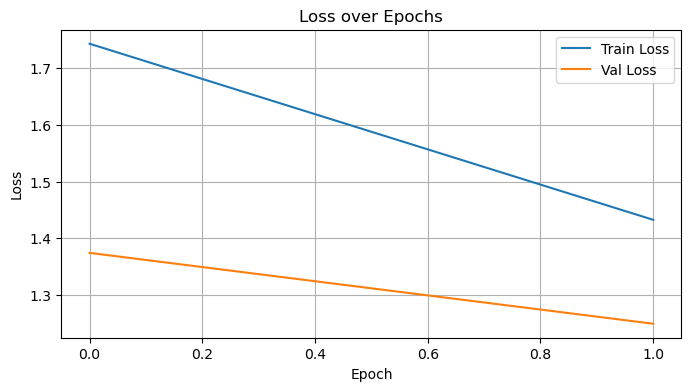

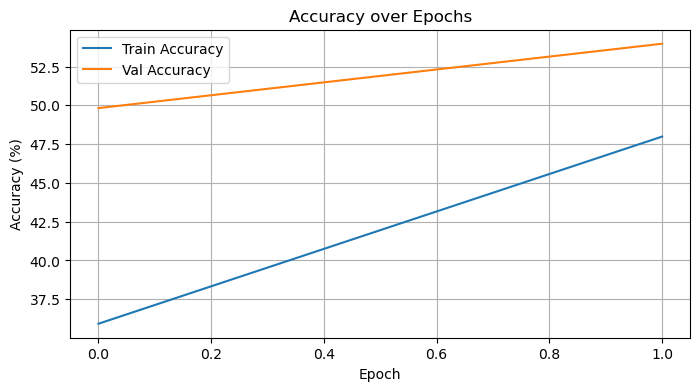

In [3]:
CIFAR10_122.train_encoder_classifier(encoder_model, classifier_model, train_loader, val_loader, args, epochs=30)

## t-SNE Analysis of Latent Spaces

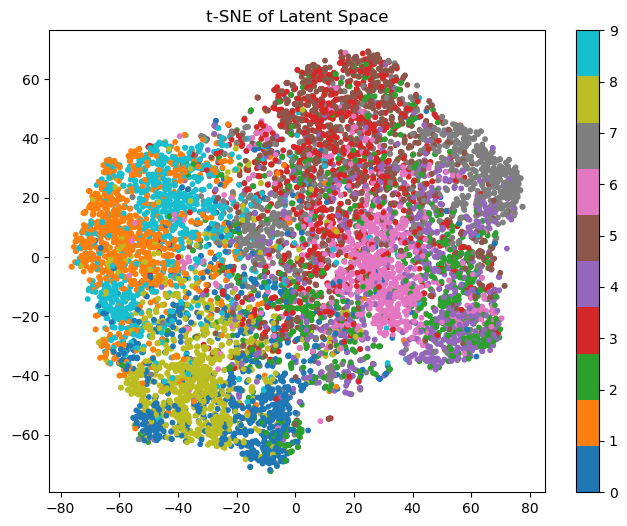

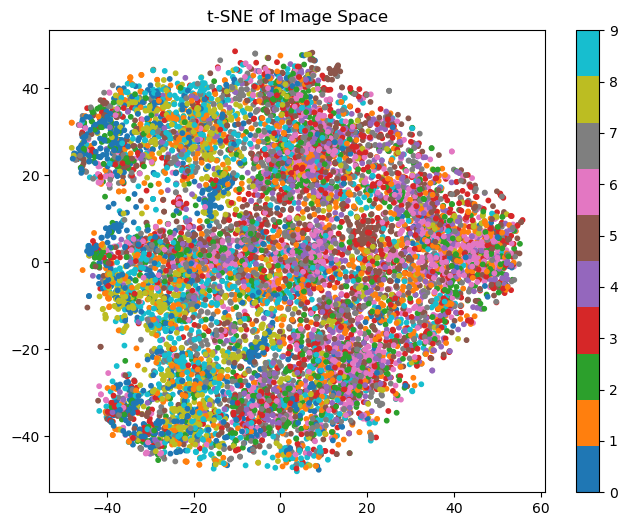

In [4]:
CIFAR10_122.plot_tsne(encoder_model, test_loader, args.device)